# Use GPU

In [1]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()

True

# Git clone your project

In [2]:
import os
import cv2
import json
import h5py
import numpy as np

In [ ]:
os.chdir('/content')
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
os.chdir('/content/cocoapi/PythonAPI')
!python3 setup.py build_ext install
!make

In [18]:
!git clone https://github.com/matterport/Mask_RCNN.git
os.chdir("/content/Mask_RCNN/samples")
!git clone https://github.com/oneling0517/VRDL_HW3.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (565/565), done.
fatal: destination path 'VRDL_HW3' already exists and is not an empty directory.


In [ ]:
!cp -r /content/cocoapi/PythonAPI/pycocotools /content/Mask_RCNN/samples/VRDL_HW3/

# Download Data

In [4]:
os.chdir("/content/Mask_RCNN")
!gdown --id '1nEJ7NTtHcCHNQqUXaoPk55VH3Uwh4QGG' --output dataset.zip

!apt-get install unzi
!unzip -q 'dataset.zip' -d dataset
# try to comment -d dataset next time

Downloading...
From: https://drive.google.com/uc?id=1nEJ7NTtHcCHNQqUXaoPk55VH3Uwh4QGG
To: /content/Mask_RCNN/dataset.zip
100% 75.9M/75.9M [00:00<00:00, 82.9MB/s]
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package unzi


# Install your requirements

In [ ]:
os.chdir("/content/Mask_RCNN")
!pip3 install -r requirements.txt
!python3 setup.py install

In [6]:
!pip uninstall keras

Found existing installation: keras 2.7.0
Uninstalling keras-2.7.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled keras-2.7.0


In [7]:
%tensorflow_version 1.x
!pip install keras==2.0.8
!pip install tensorflow-gpu==1.15.2

TensorFlow 1.x selected.
     |████████████████████████████████| 276 kB 10.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 410.9 MB 31 kB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d14275fbdeb87e75ec8d4be37c6c2582e78e41bf56560c1ae7d56c7e3d03a02d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.


In [8]:
# If there is an error last time, you can run this.
!pip install keras==2.0.8

# Check the version

In [9]:
import tensorflow as tf
import keras as kr

print("Tensorflow:", tf.__version__)
print("Keras:", kr.__version__)

Using TensorFlow backend.


Tensorflow: 1.15.2
Keras: 2.0.8


# Load Folder Name

In [ ]:
os.chdir("/content/Mask_RCNN")
dir = "/dataset/dataset/train/"
array_of_img = [] 
folder_name = []
def read_directory(directory_name):
    # this loop is for read each image in this foder,directory_name is the foder name with images.
  num=0
  for filename in os.listdir(r"./"+directory_name):
      i=0
      folder_name.append(filename)
      num+=1
  print(folder_name)

read_directory(dir)

['TCGA-G9-6362-01Z-00-DX1', 'TCGA-21-5784-01Z-00-DX1', 'TCGA-AR-A1AS-01Z-00-DX1', 'TCGA-A7-A13F-01Z-00-DX1', 'TCGA-E2-A14V-01Z-00-DX1', 'TCGA-RD-A8N9-01A-01-TS1', 'TCGA-49-4488-01Z-00-DX1', 'TCGA-E2-A1B5-01Z-00-DX1', 'TCGA-G9-6356-01Z-00-DX1', 'TCGA-KB-A93J-01A-01-TS1', 'TCGA-AR-A1AK-01Z-00-DX1', 'TCGA-B0-5710-01Z-00-DX1', 'TCGA-HE-7129-01Z-00-DX1', 'TCGA-18-5592-01Z-00-DX1', 'TCGA-HE-7128-01Z-00-DX1', 'TCGA-B0-5698-01Z-00-DX1', 'TCGA-HE-7130-01Z-00-DX1', 'TCGA-21-5786-01Z-00-DX1', 'TCGA-38-6178-01Z-00-DX1', 'TCGA-CH-5767-01Z-00-DX1', 'TCGA-NH-A8F7-01A-01-TS1', 'TCGA-B0-5711-01Z-00-DX1', 'TCGA-G9-6363-01Z-00-DX1', 'TCGA-DK-A2I6-01A-01-TS1']


/content/dataset/dataset/train/TCGA-G9-6363-01Z-00-DX1/images/TCGA-G9-6363-01Z-00-DX1.png


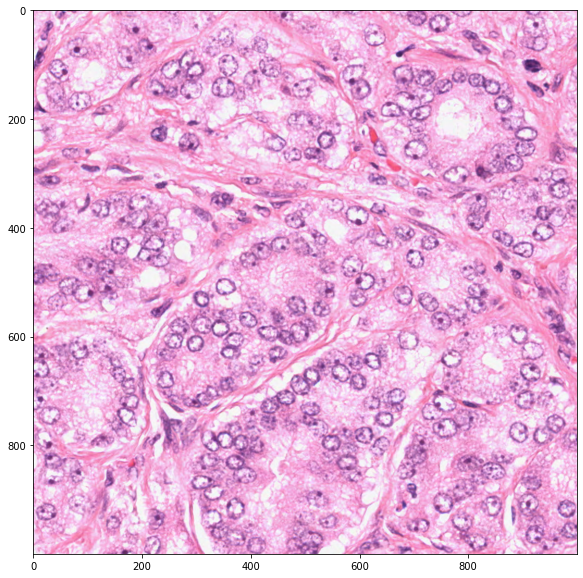

In [ ]:
import mmcv
import matplotlib.pyplot as plt
i=0
dir = "/content/Mask_RCNN/dataset/dataset/train/" + folder_name[i] + "/images/" + folder_name[i] + ".png"
print(dir)
img=mmcv.imread(dir)
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

# Start Training

In [ ]:
os.chdir("/content/Mask_RCNN/samples/VRDL_HW3")
!python3 nucleus.py train --dataset=/content/Mask_RCNN/dataset/dataset --subset=train --weights=imagenet

Using TensorFlow backend.
Weights:  imagenet
Dataset:  /content/Mask_RCNN/dataset/dataset
Subset:  train
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1

# Install another h5py version

In [14]:
!pip uninstall h5py

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0


In [15]:
!pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     |████████████████████████████████| 2.9 MB 249 kB/s 


# Validation

In [17]:
os.chdir("/content/Mask_RCNN/samples/VRDL_HW3")

!python3 nucleus.py train --dataset=/content/Mask_RCNN/dataset/dataset --subset=val --weights=/content/Mask_RCNN/logs/nucleus20211216T1140/mask_rcnn_nucleus_0008.h5

Using TensorFlow backend.
Weights:  /content/Mask_RCNN/logs/nucleus20211216T1140/mask_rcnn_nucleus_0008.h5
Dataset:  /content/Mask_RCNN/dataset/dataset
Subset:  val
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS 

# Testing

In [34]:
os.chdir("/content/Mask_RCNN/dataset/dataset")
with open('test_img_ids.json') as f:
  data = json.load(f)

print(data)

[{'file_name': 'TCGA-A7-A13E-01Z-00-DX1.png', 'height': 1000, 'id': 1, 'width': 1000}, {'file_name': 'TCGA-50-5931-01Z-00-DX1.png', 'height': 1000, 'id': 2, 'width': 1000}, {'file_name': 'TCGA-G2-A2EK-01A-02-TSB.png', 'height': 1000, 'id': 3, 'width': 1000}, {'file_name': 'TCGA-AY-A8YK-01A-01-TS1.png', 'height': 1000, 'id': 4, 'width': 1000}, {'file_name': 'TCGA-G9-6336-01Z-00-DX1.png', 'height': 1000, 'id': 5, 'width': 1000}, {'file_name': 'TCGA-G9-6348-01Z-00-DX1.png', 'height': 1000, 'id': 6, 'width': 1000}]


In [35]:
os.chdir("/content/Mask_RCNN/samples/VRDL_HW3")
!python3 nucleus.py detect --dataset=/content/Mask_RCNN/dataset/dataset --subset=test --weights=/content/Mask_RCNN/logs/nucleus20211216T0452/mask_rcnn_nucleus_0003.h5

Using TensorFlow backend.
Weights:  /content/Mask_RCNN/logs/nucleus20211216T0452/mask_rcnn_nucleus_0003.h5
Dataset:  /content/Mask_RCNN/dataset/dataset
Subset:  test
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHT